In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=6,3
sns.set_theme(style="whitegrid", palette="dark")

In [2]:
productivity=pd.read_csv(r'C:\Users\admin\Downloads\archive (1)\social_media_vs_productivity.csv')

In [3]:
productivity

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [4]:
productivity.shape

(30000, 19)

In [5]:
productivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [6]:
productivity.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

In [7]:
numeric_cols = productivity.select_dtypes(include=['float64', 'int64']).columns
productivity[numeric_cols] = productivity[numeric_cols].fillna(productivity[numeric_cols].mean())

# Fill object (categorical) columns with mode
object_cols = productivity.select_dtypes(include=['object']).columns
for col in object_cols:
    productivity[col] = productivity[col].fillna(productivity[col].mode()[0])

# If needed, fill boolean columns (optional: with mode or False/True)
bool_cols = productivity.select_dtypes(include=['bool']).columns
for col in bool_cols:
    productivity[col] = productivity[col].fillna(productivity[col].mode()[0])  # or df[col].fillna(False)

# Now df has no null values
print(productivity.isnull().sum())

age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64


In [8]:
productivity.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

In [9]:
productivity.columns

Index(['age', 'gender', 'job_type', 'daily_social_media_time',
       'social_platform_preference', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
       'days_feeling_burnout_per_month', 'weekly_offline_hours',
       'job_satisfaction_score'],
      dtype='object')

In [10]:
len(productivity.columns)

19

In [11]:
productivity.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,1.976884,7.723772,1.997736,1.968285,1.807615,2.773891,1.399175,0.628817,3.173737,1.410047,9.252956,7.280415,2.022374
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.797748,55.000000,5.643771,3.858604,3.509336,3.000000,5.598942,0.569569,2.000000,1.000000,8.000000,4.541872,3.528486
50%,41.000000,3.113418,60.000000,6.990641,5.510488,4.951805,5.514059,6.500247,1.025568,5.000000,2.000000,16.000000,10.013677,4.964901
75%,53.000000,4.219533,65.000000,8.354725,7.168062,6.396285,8.000000,7.398974,1.435798,8.000000,3.000000,24.000000,15.300809,6.407090
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


In [12]:
productivity.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30000.0,41.486867,13.835221,18.000000,30.000000,41.000000,53.000000,65.000000
daily_social_media_time,30000.0,3.113418,1.976884,0.000000,1.797748,3.113418,4.219533,17.973256
number_of_notifications,30000.0,59.958767,7.723772,30.000000,55.000000,60.000000,65.000000,90.000000
work_hours_per_day,30000.0,6.990792,1.997736,0.000000,5.643771,6.990641,8.354725,12.000000
perceived_productivity_score,30000.0,5.510488,1.968285,2.000252,3.858604,5.510488,7.168062,8.999376
actual_productivity_score,30000.0,4.951805,1.807615,0.296812,3.509336,4.951805,6.396285,9.846258
stress_level,30000.0,5.514059,2.773891,1.000000,3.000000,5.514059,8.000000,10.000000
sleep_hours,30000.0,6.500247,1.399175,3.000000,5.598942,6.500247,7.398974,10.000000
screen_time_before_sleep,30000.0,1.025568,0.628817,0.000000,0.569569,1.025568,1.435798,3.000000
breaks_during_work,30000.0,4.992200,3.173737,0.000000,2.000000,5.000000,8.000000,10.000000


In [13]:
productivity.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


<Axes: xlabel='age', ylabel='Density'>

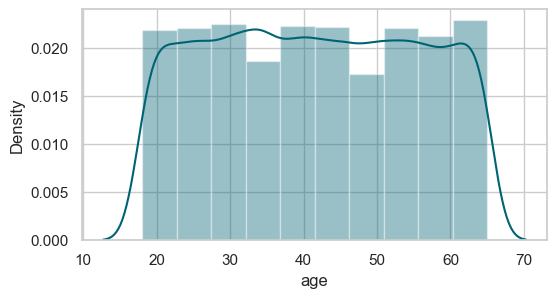

In [14]:
sns.distplot(productivity.age,color='c',bins=10)

<Axes: xlabel='daily_social_media_time', ylabel='Density'>

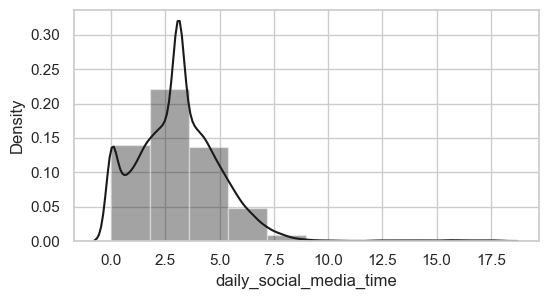

In [15]:
sns.distplot(productivity.daily_social_media_time,color='k',bins=10)

<Axes: xlabel='number_of_notifications', ylabel='Density'>

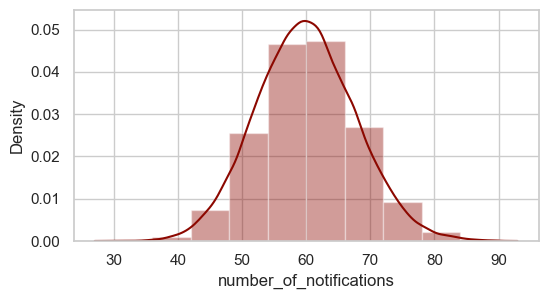

In [16]:
sns.distplot(productivity.number_of_notifications,color='r',bins=10)

<Axes: xlabel='work_hours_per_day', ylabel='Density'>

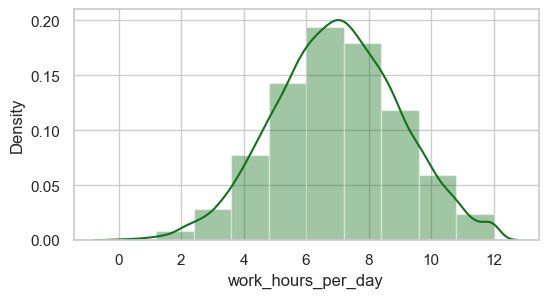

In [17]:
sns.distplot(productivity.work_hours_per_day,color='g',bins=10)

<Axes: xlabel='perceived_productivity_score', ylabel='Density'>

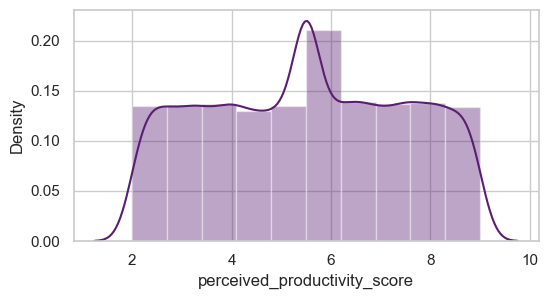

In [18]:
sns.distplot(productivity.perceived_productivity_score,color='m',bins=10)

<Axes: xlabel='actual_productivity_score', ylabel='Density'>

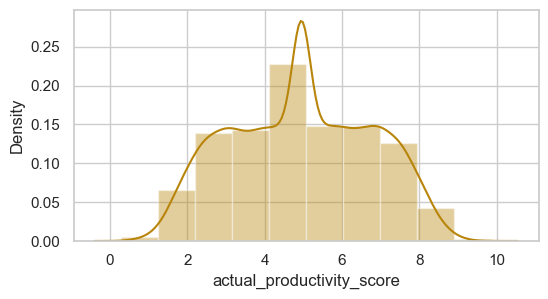

In [19]:
sns.distplot(productivity.actual_productivity_score,color='y',bins=10)

<Axes: xlabel='stress_level', ylabel='Density'>

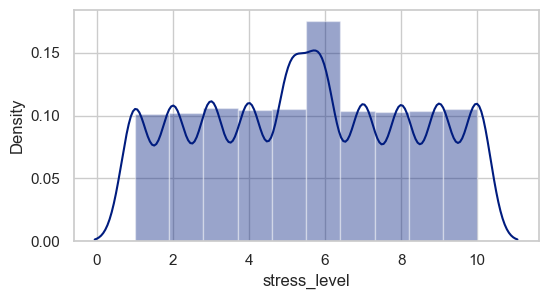

In [20]:
sns.distplot(productivity.stress_level,color='b',bins=10)

<Axes: xlabel='sleep_hours', ylabel='Density'>

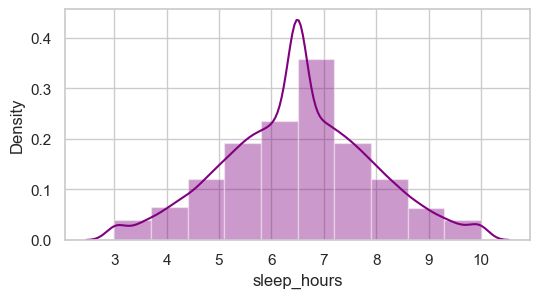

In [21]:
sns.distplot(productivity.sleep_hours,color='purple',bins=10)

<Axes: xlabel='screen_time_before_sleep', ylabel='Density'>

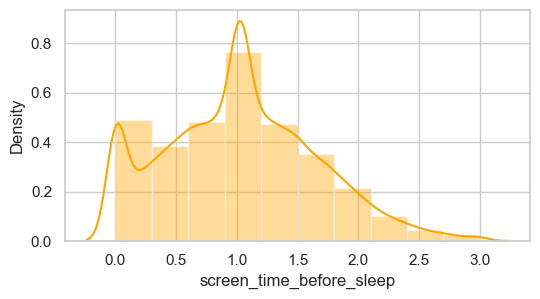

In [22]:
sns.distplot(productivity.screen_time_before_sleep,color='orange',bins=10)

<Axes: xlabel='breaks_during_work', ylabel='Density'>

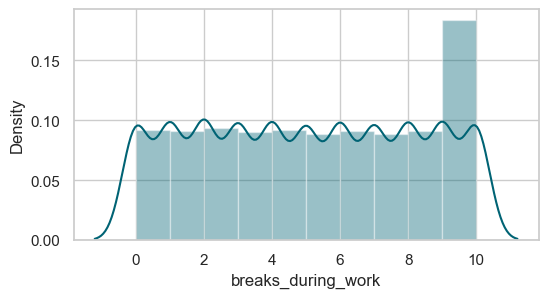

In [23]:
sns.distplot(productivity.breaks_during_work,color='c',bins=10)

<Axes: xlabel='weekly_offline_hours', ylabel='Density'>

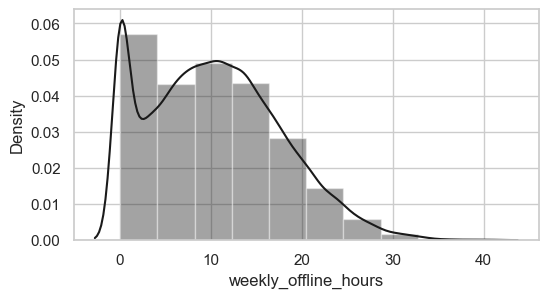

In [24]:
sns.distplot(productivity.weekly_offline_hours,color='k',bins=10)

<Axes: xlabel='job_satisfaction_score', ylabel='Density'>

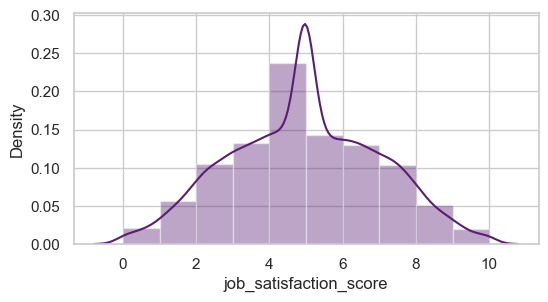

In [25]:
sns.distplot(productivity.job_satisfaction_score,color='m',bins=10)

In [26]:
productivity.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


<Axes: xlabel='gender', ylabel='count'>

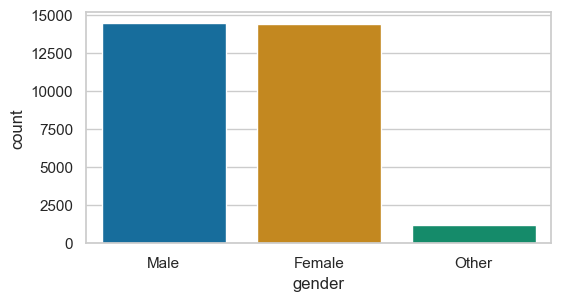

In [27]:
sns.countplot(data=productivity,x='gender',palette='colorblind')

<Axes: xlabel='coffee_consumption_per_day', ylabel='count'>

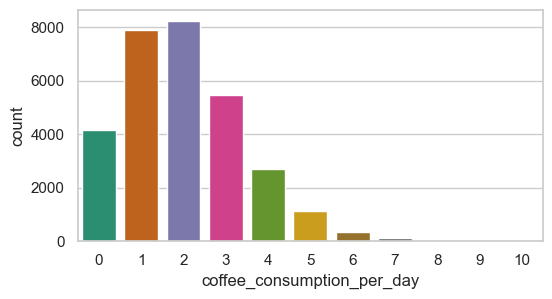

In [28]:
sns.countplot(data=productivity,x='coffee_consumption_per_day',palette='Dark2')

<Axes: xlabel='uses_focus_apps', ylabel='count'>

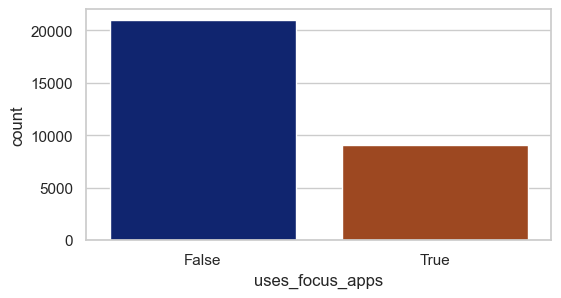

In [29]:
sns.countplot(data=productivity,x='uses_focus_apps',palette='dark')

<Axes: xlabel='job_type', ylabel='count'>

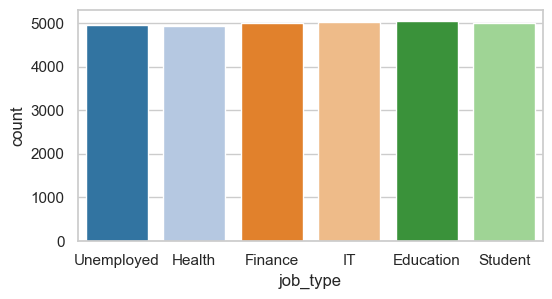

In [30]:
sns.countplot(data=productivity,x='job_type',palette='tab20')

<Axes: xlabel='has_digital_wellbeing_enabled', ylabel='count'>

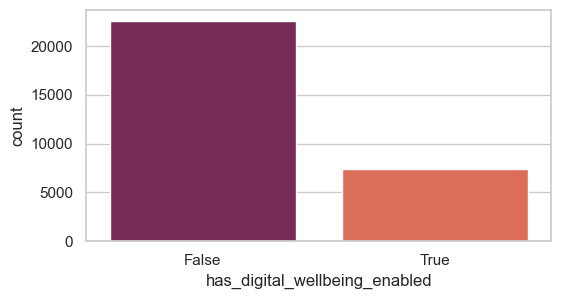

In [31]:
sns.countplot(data=productivity,x='has_digital_wellbeing_enabled',palette='rocket')

<Axes: xlabel='social_platform_preference', ylabel='count'>

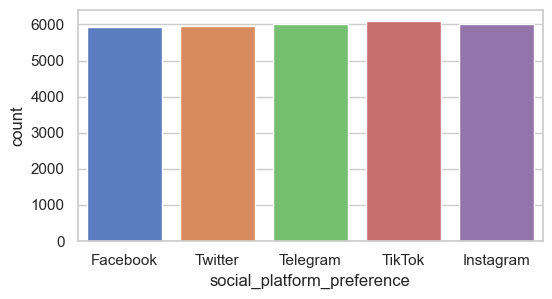

In [32]:
sns.countplot(data=productivity,x='social_platform_preference',palette='muted')

In [33]:
productivity.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


<Axes: xlabel='gender', ylabel='count'>

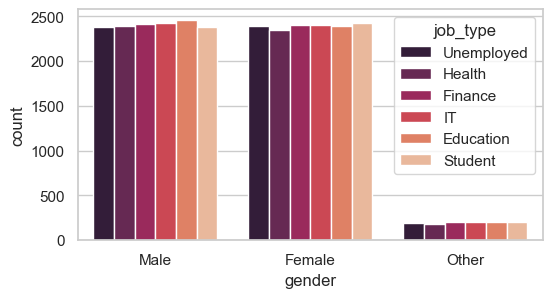

In [34]:
sns.countplot(data=productivity,x='gender',hue='job_type',palette='rocket')

<Axes: xlabel='uses_focus_apps', ylabel='count'>

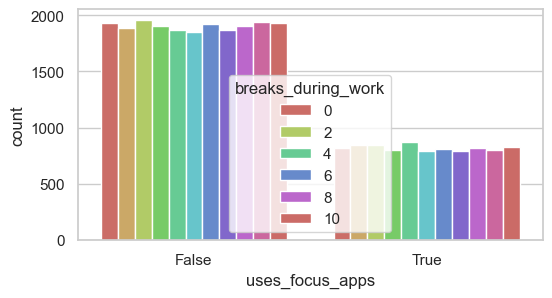

In [35]:
sns.countplot(data=productivity,x='uses_focus_apps',hue='breaks_during_work',palette='hls')

<Axes: xlabel='has_digital_wellbeing_enabled', ylabel='count'>

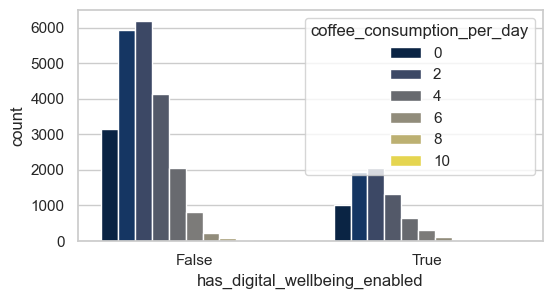

In [36]:
sns.countplot(data=productivity,x='has_digital_wellbeing_enabled',hue='coffee_consumption_per_day',palette='cividis')

<Axes: xlabel='gender', ylabel='count'>

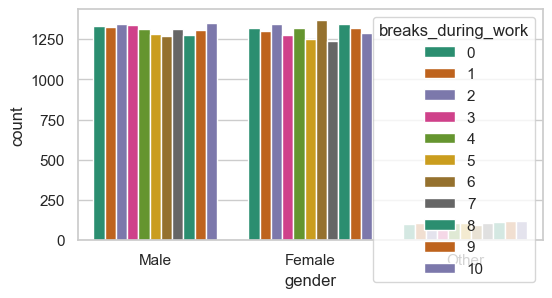

In [37]:
sns.countplot(data=productivity,x='gender',hue='breaks_during_work',palette='Dark2')

<Axes: xlabel='gender', ylabel='count'>

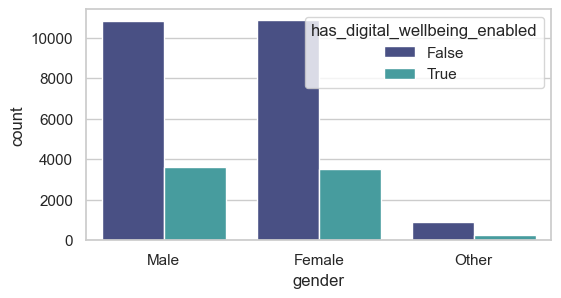

In [38]:
sns.countplot(data=productivity,x='gender',hue='has_digital_wellbeing_enabled',palette='mako')

<Axes: xlabel='job_type', ylabel='count'>

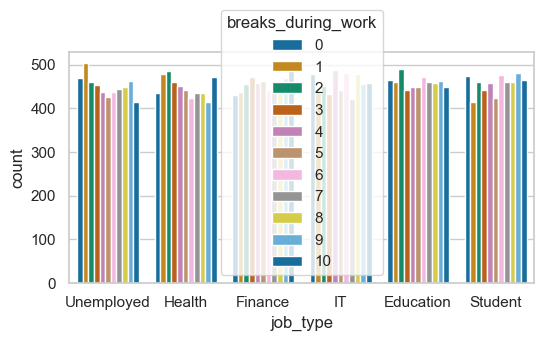

In [39]:
sns.countplot(data=productivity,x='job_type',hue='breaks_during_work',palette='colorblind')

<Axes: xlabel='gender', ylabel='count'>

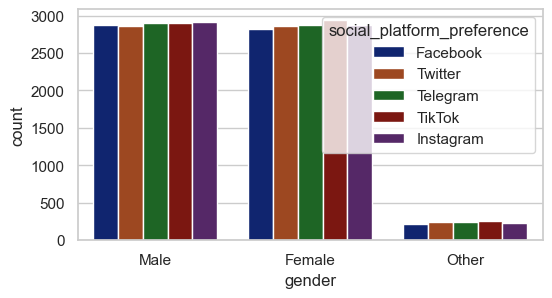

In [40]:
sns.countplot(data=productivity,x='gender',hue='social_platform_preference',palette='dark')

In [41]:
productivity.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


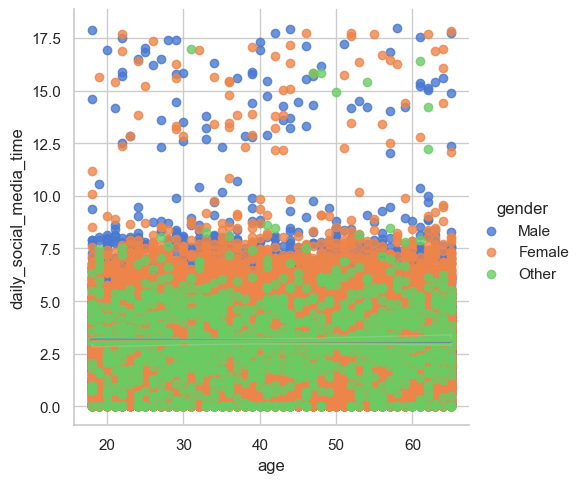

In [42]:
sns.lmplot(data=productivity,x='age',y='daily_social_media_time',palette='muted',hue='gender')

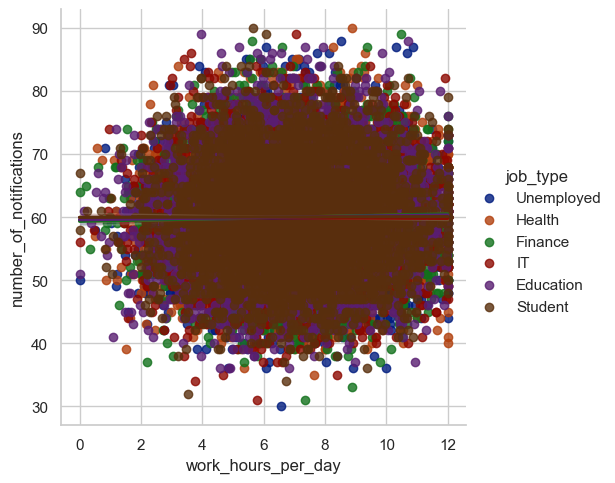

In [43]:
sns.lmplot(data=productivity,x='work_hours_per_day',y='number_of_notifications',palette='dark',hue='job_type')

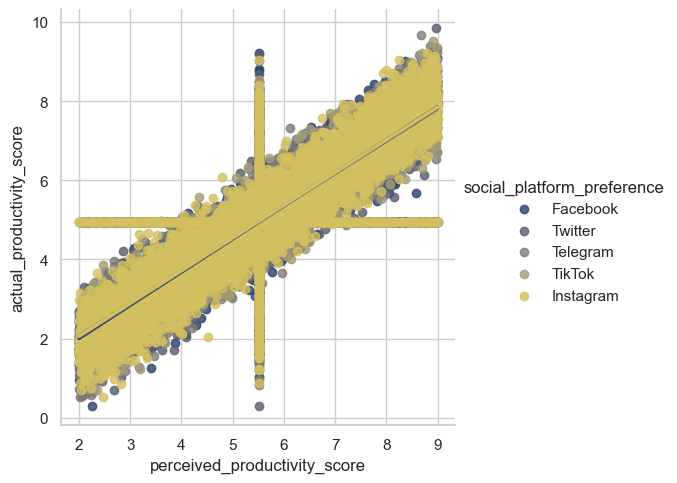

In [44]:
sns.lmplot(data=productivity,x='perceived_productivity_score',y='actual_productivity_score',palette='cividis',hue='social_platform_preference')

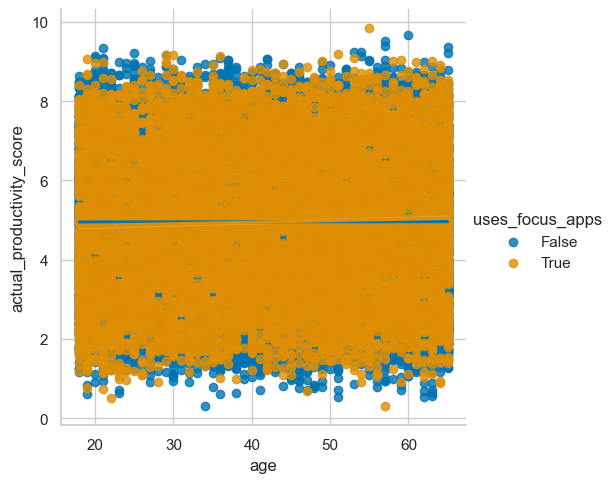

In [45]:
sns.lmplot(data=productivity,x='age',y='actual_productivity_score',palette='colorblind',hue='uses_focus_apps')

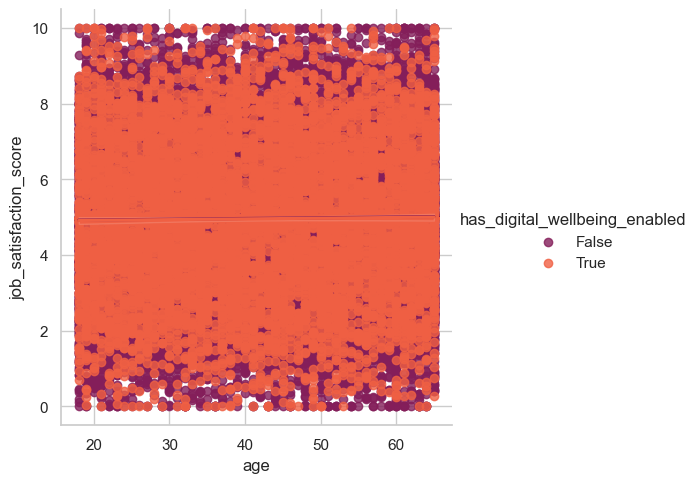

In [46]:
sns.lmplot(data=productivity,x='age',y='job_satisfaction_score',palette='rocket',hue='has_digital_wellbeing_enabled')

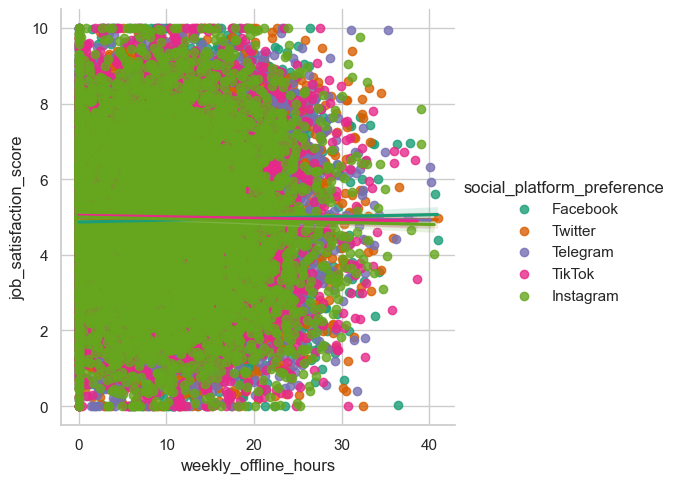

In [47]:
sns.lmplot(data=productivity,x='weekly_offline_hours',y='job_satisfaction_score',palette='Dark2',hue='social_platform_preference')

In [48]:
productivity.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


<Axes: xlabel='gender', ylabel='age'>

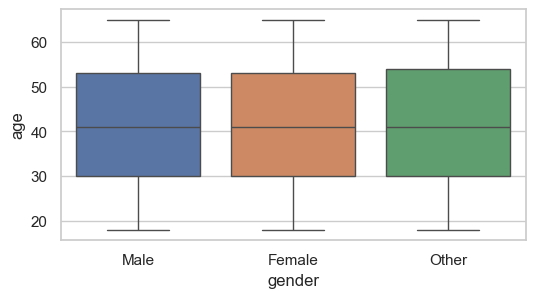

In [49]:
sns.boxplot(data=productivity,x='gender',y='age',palette='deep')

<Axes: xlabel='job_type', ylabel='daily_social_media_time'>

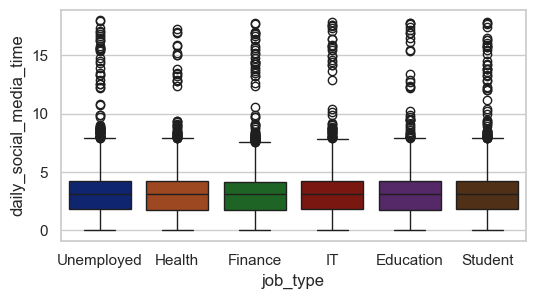

In [50]:
sns.boxplot(data=productivity,x='job_type',y='daily_social_media_time',palette='dark')

<Axes: xlabel='social_platform_preference', ylabel='work_hours_per_day'>

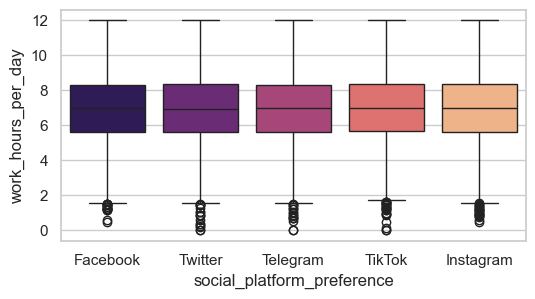

In [51]:
sns.boxplot(data=productivity,x='social_platform_preference',y='work_hours_per_day',palette='magma')

<Axes: xlabel='uses_focus_apps', ylabel='perceived_productivity_score'>

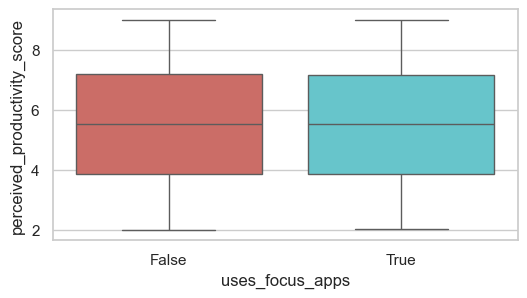

In [52]:
sns.boxplot(data=productivity,x='uses_focus_apps',y='perceived_productivity_score',palette='hls')

<Axes: xlabel='has_digital_wellbeing_enabled', ylabel='stress_level'>

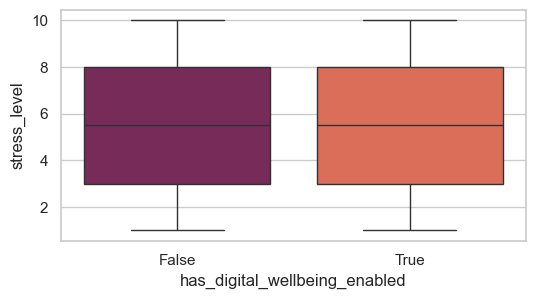

In [53]:
sns.boxplot(data=productivity,x='has_digital_wellbeing_enabled',y='stress_level',palette='rocket')

<Axes: xlabel='coffee_consumption_per_day', ylabel='sleep_hours'>

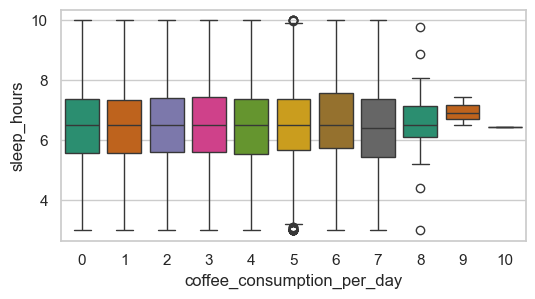

In [54]:
sns.boxplot(data=productivity,x='coffee_consumption_per_day',y='sleep_hours',palette='Dark2')

<Axes: xlabel='breaks_during_work', ylabel='days_feeling_burnout_per_month'>

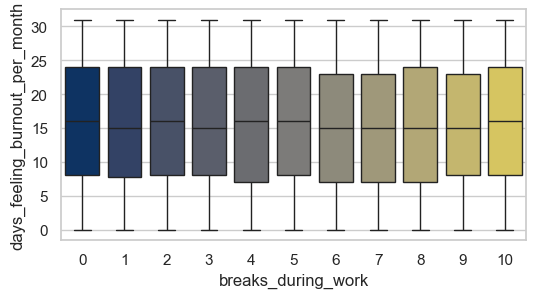

In [55]:
sns.boxplot(data=productivity,x='breaks_during_work',y='days_feeling_burnout_per_month',palette='cividis')

<Axes: xlabel='job_type', ylabel='weekly_offline_hours'>

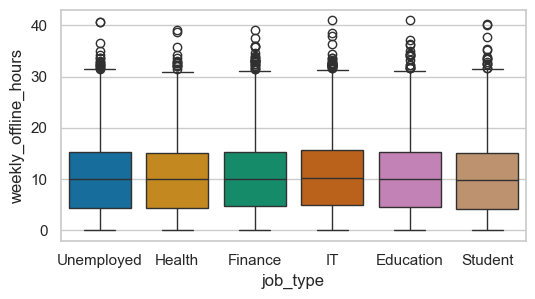

In [56]:
sns.boxplot(data=productivity,x='job_type',y='weekly_offline_hours',palette='colorblind')

<Axes: xlabel='job_type', ylabel='job_satisfaction_score'>

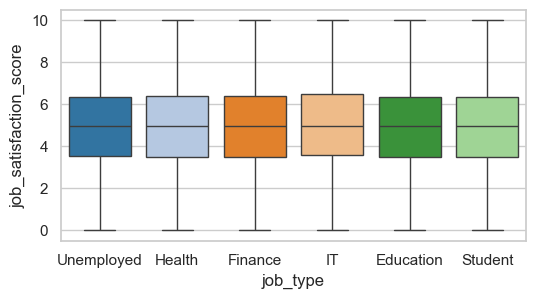

In [57]:
sns.boxplot(data=productivity,x='job_type',y='job_satisfaction_score',palette='tab20')

In [58]:
productivity.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


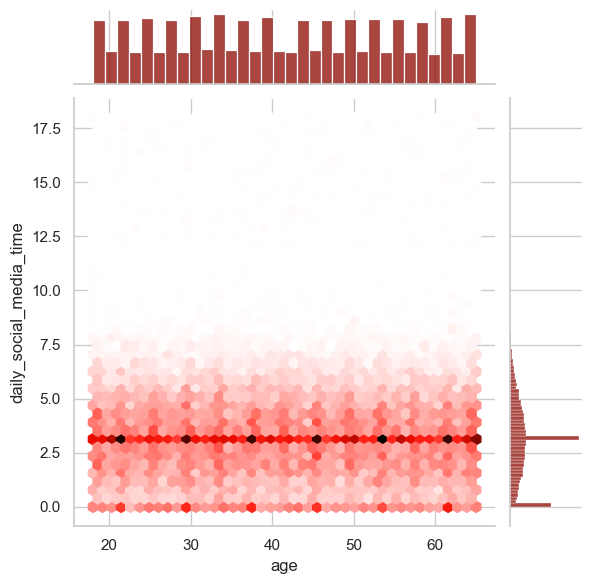

In [59]:
sns.jointplot(data=productivity,x='age',y='daily_social_media_time',color='r',kind='hex')

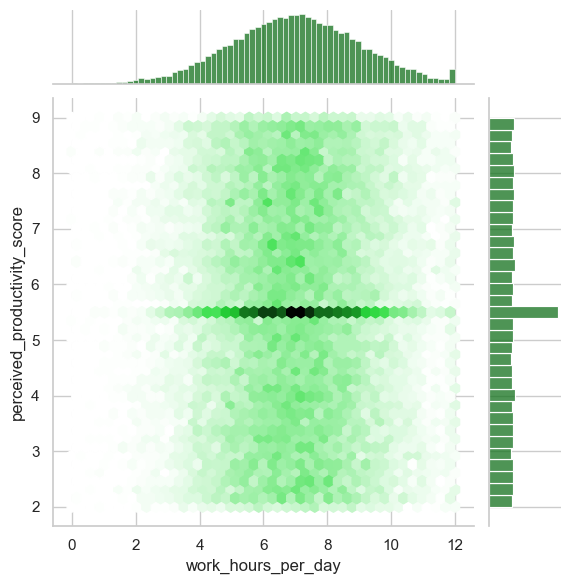

In [60]:
sns.jointplot(data=productivity,x='work_hours_per_day',y='perceived_productivity_score',color='g',kind='hex')

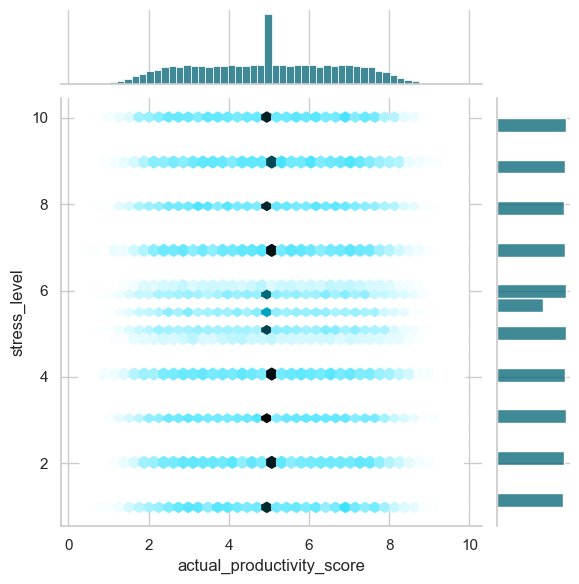

In [61]:
sns.jointplot(data=productivity,x='actual_productivity_score',y='stress_level',color='c',kind='hex')

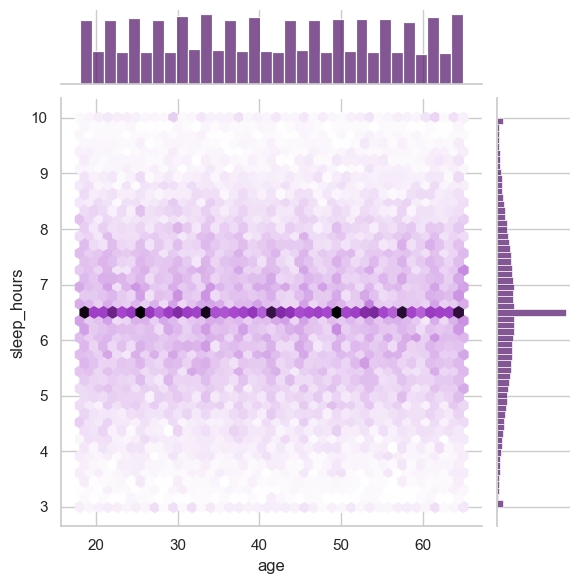

In [62]:
sns.jointplot(data=productivity,x='age',y='sleep_hours',color='m',kind='hex')

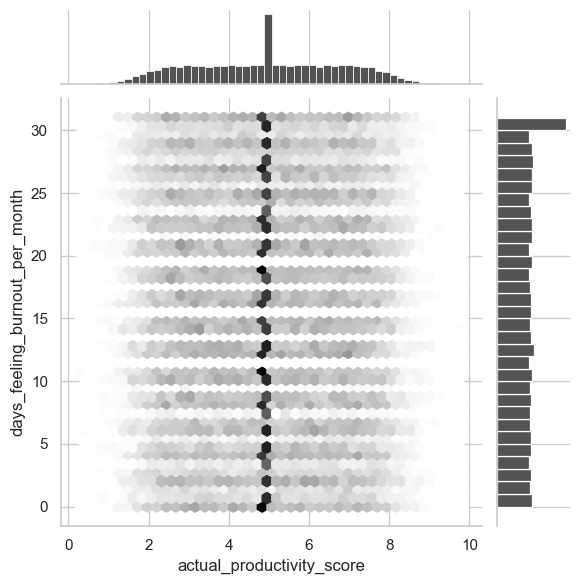

In [63]:
sns.jointplot(data=productivity,x='actual_productivity_score',y='days_feeling_burnout_per_month',color='k',kind='hex')

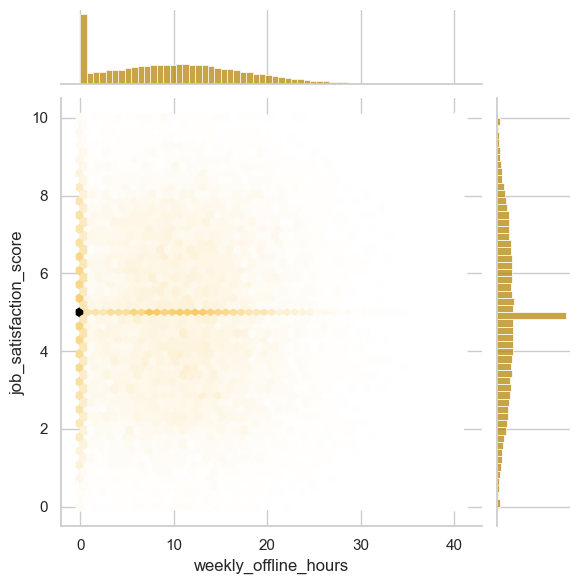

In [64]:
sns.jointplot(data=productivity,x='weekly_offline_hours',y='job_satisfaction_score',color='y',kind='hex')

In [65]:
productivity.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


<Axes: xlabel='gender', ylabel='age'>

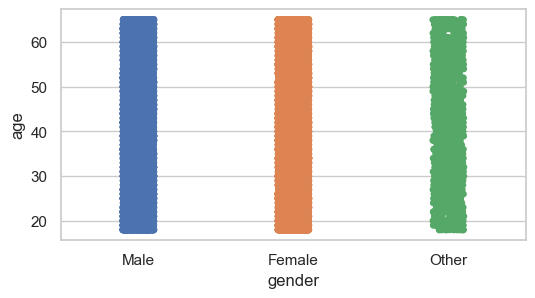

In [66]:
sns.stripplot(data=productivity,x='gender',y='age',palette='deep')

<Axes: xlabel='job_type', ylabel='daily_social_media_time'>

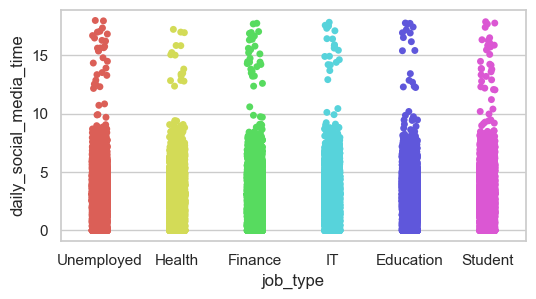

In [67]:
sns.stripplot(data=productivity,x='job_type',y='daily_social_media_time',palette='hls')

<Axes: xlabel='social_platform_preference', ylabel='social_platform_preference'>

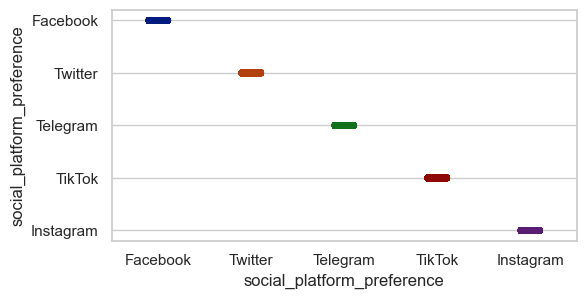

In [68]:
sns.stripplot(data=productivity,x='social_platform_preference',y='social_platform_preference',palette='dark')

<Axes: xlabel='breaks_during_work', ylabel='work_hours_per_day'>

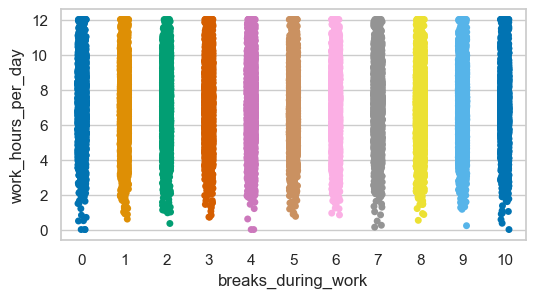

In [69]:
sns.stripplot(data=productivity,x='breaks_during_work',y='work_hours_per_day',palette='colorblind')

<Axes: xlabel='uses_focus_apps', ylabel='actual_productivity_score'>

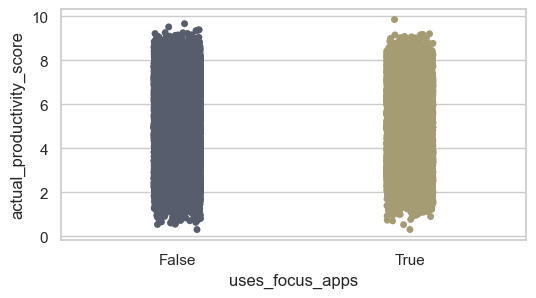

In [70]:
sns.stripplot(data=productivity,x='uses_focus_apps',y='actual_productivity_score',palette='cividis')

<Axes: xlabel='has_digital_wellbeing_enabled', ylabel='weekly_offline_hours'>

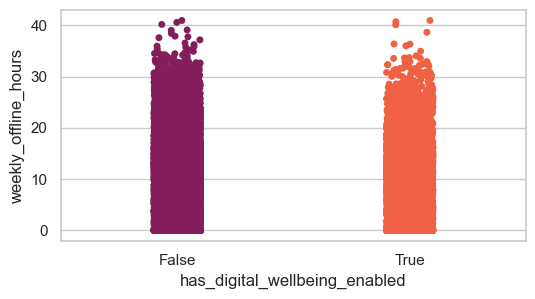

In [71]:
sns.stripplot(data=productivity,x='has_digital_wellbeing_enabled',y='weekly_offline_hours',palette='rocket')

<Axes: xlabel='coffee_consumption_per_day', ylabel='job_satisfaction_score'>

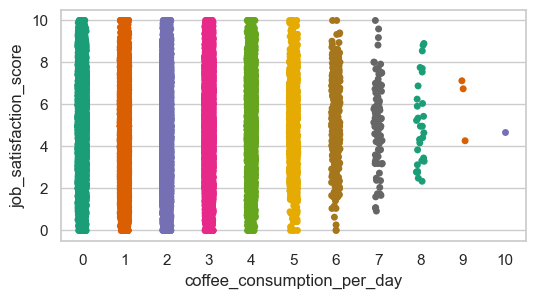

In [72]:
sns.stripplot(data=productivity,x='coffee_consumption_per_day',y='job_satisfaction_score',palette='Dark2')

In [73]:
productivity.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


<Axes: xlabel='age', ylabel='Density'>

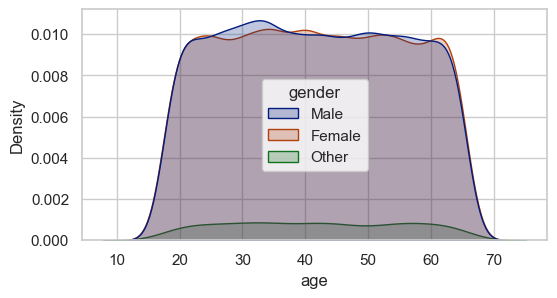

In [74]:
sns.kdeplot(data=productivity,x='age',hue='gender',palette='dark',fill=True)

<Axes: xlabel='daily_social_media_time', ylabel='Density'>

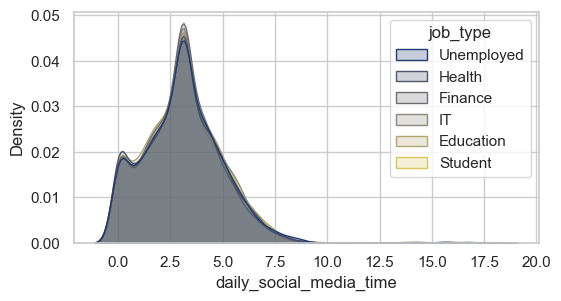

In [75]:
sns.kdeplot(data=productivity,x='daily_social_media_time',hue='job_type',palette='cividis',fill=True)

<Axes: xlabel='days_feeling_burnout_per_month', ylabel='Density'>

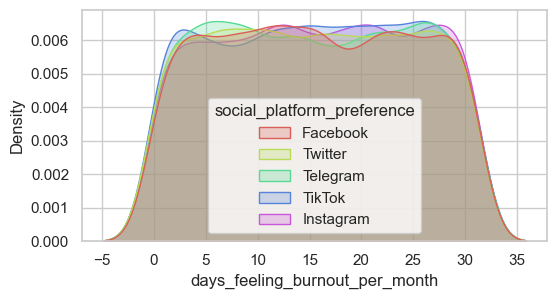

In [76]:
sns.kdeplot(data=productivity,x='days_feeling_burnout_per_month',hue='social_platform_preference',palette='hls',fill=True)

<Axes: xlabel='work_hours_per_day', ylabel='Density'>

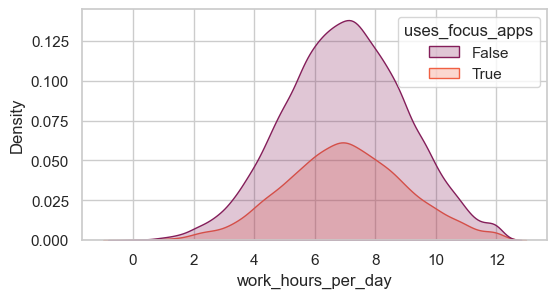

In [77]:
sns.kdeplot(data=productivity,x='work_hours_per_day',hue='uses_focus_apps',palette='rocket',fill=True)

<Axes: xlabel='actual_productivity_score', ylabel='Density'>

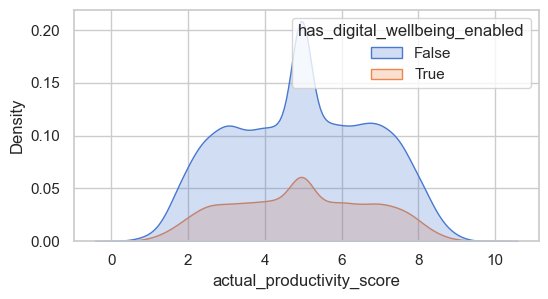

In [78]:
sns.kdeplot(data=productivity,x='actual_productivity_score',hue='has_digital_wellbeing_enabled',palette='muted',fill=True)

<Axes: xlabel='weekly_offline_hours', ylabel='Density'>

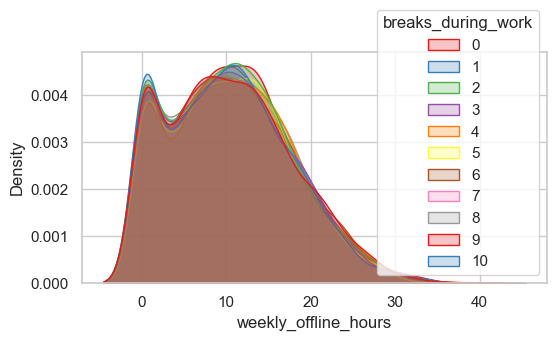

In [79]:
sns.kdeplot(data=productivity,x='weekly_offline_hours',hue='breaks_during_work',palette='Set1',fill=True)

<Axes: xlabel='job_satisfaction_score', ylabel='Density'>

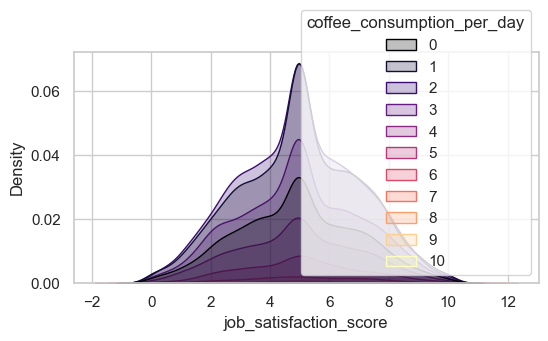

In [80]:
sns.kdeplot(data=productivity,x='job_satisfaction_score',hue='coffee_consumption_per_day',palette='magma',fill=True)